<img src="img/stda.png" alt="STDA Logo" style="width: 150px;"/>

# Einführung in Python

## Warum Python?

Python ist eine sog. general-purpose Programmiersprache. Sie genießt weite Verbreitung in einer Vielzahl von Einsatzgebieten, darunter insbesondere die Web und Internet Entwicklung, das Wissenschaftliche Rechnen sowie die Lehre. Eines der wichtigsten Ziele von Python ist es, lesbaren und klaren Programmcode zu ermöglichen. Daher gilt die Sprache gemeinhin auch als leicht zu erlernen.

Zu Python gehört außerdem ein großes Ökosystem aus Bibliotheken, Frameworks und Tools, sodass für viele Anwendungsfälle bereits performante Standardlösungen existieren.

## Die Sprache

### Python ist imperativ:

Imperative Sprachen verwenden sequentielle Ausdrücke um den Zustand des Programms zu ändern.

In [13]:
a = 5
b = 3
c = a * b

print("a + b = %d" % c)

a + b = 15


## Python ist funktional:

Funktionale Sprachen bieten die Möglichkeit, ein Programm oder Teile dessen in Form von mathematischen Funktionen auszudrücken um Details der eigentlichen Ausführung zu abstrahieren. 

In [14]:
even_numbers = [n for n in range(20) if n % 2 == 0]

print(even_numbers)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Python ist prozedural:

Prozedurale Sprachen fassen Programmsegmente, die wiederholt ausgeführt werden, in sogenannten Prozeduren (auch Funktionen genannt) zusammen. 

In [15]:
def fib(n):
    if n == 1 or n == 0:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
print("fib(3) = %d" % fib(3))
print("fib(5) = %d" % fib(5))
print("fib(8) = %d" % fib(8))

fib(3) = 3
fib(5) = 8
fib(8) = 34


# Aufgaben

## Importieren

Damit wir nicht mit jedem neuen Programm auch alle grundlegenden Funktionen neu definieren müssen, können wir in Python sogenannte Pakete und Module importieren. Daher ist der erste Schritt beim Schreiben eines Programms für gewöhnlich das Importieren der benötigten Funktionen und Klassen.

## Syntax

`[from <module/package>] import <thing/module> [as alias]`

### Aufgabe
Importiert `numpy` mit dem Namen `np`, das Modul `pyplot` aus dem Package `matplotlib` mit dem Namen `plt` und die Funktionen `sin` und `cos` aus `math`. Danach sollte die darauffolgende Kontrollcode die Funktion sin auf dem Intervall [0, 2pi) Zeichnen.

In [16]:
import numpy                      as np
from   matplotlib import pyplot   as plt
from   math       import sin, cos

### Kontrolle

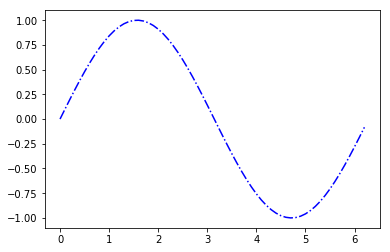

In [17]:
# Der Abstand zwischen x-Werten
dx = 0.1

# Alle werte in [0, 2pi) mit dem Abstand step_size:
# xs = [0, 0.1, 0.2, ... 2pi - 0.1]
xs = np.arange(0, 2 * np.pi, dx)

# Werte sin für alle Werte in xs aus:
ys = np.vectorize(sin)(xs)

# Zeichne den Funktionsgraphen von sin als blau gestrichelte Linie:
plt.plot(xs, ys, '-.b')
plt.show()

## Definieren einer Funktion



### Aufgabe
Definiert eine Funktion `y(t)` mit der folgenden Abbildungsvorschrift:

\begin{equation}
    y = \frac{sin(t^2)}{t}
\end{equation}

Sowie die Ableitung `y_d(t, y)` mit:

\begin{equation}
\begin{split}
    \dot y &= 2cos(t^2) - \frac{sin(t^2)}{t^2} \\
           &= 2cos(t^2) - \frac{y}{t}
\end{split}
\end{equation}

Dafür braucht ihr:
- `def f(x):` um eine Funktion zu definieren
- `return x` um einen Werte zurück zu geben
- `x**y` um $x^y$ zu berechnen

In [18]:
def y(t):
    return sin(t**2) / t

def y_d(t, y):
    return 2 * cos(t**2) - y / t

### Kontrolle

In [19]:
# Mit assert können wir zur Laufzeit sicherstellen, dass bestimmte Konditionen erfüllt werden.
# Hier sieht man außerdem den Zeilenumbruch mit \ und das Einfügen variabler Werte mittels %f in einen String.
assert y(1) == 0.8414709848078965, \
       "y(1) sollte 0.8414709848078965 sein, ist aber %f" %y(1)
assert y_d(1, 1) == 0.08060461173627953, \
       "y_d(1, 1)$ sollte 0.08060461173627953 sein, ist aber %f" %y_d(1, 1)

## Simulation

Ein mögliches Einsatzgebiet von Python ist die Simulation, und eine der einfachsten Methoden zur Simulation ist der sogenannte explizite Euler:

\begin{equation}
    y_{j+1} = y_j + \Delta t * f(t_j, y_j)
\end{equation}

Wobei für $f(t, y)$ gilt:
\begin{equation}
    \dot y = f(t, y)
\end{equation}

### Aufgabe

Für $f(t, y)$ verwenden wir im folgenden Teil die bereits definierte Funktion `y_d(t, y)`. Also brauchen wir jetzt noch eine Funktione `expl_euler(f, t, y, dt=0.1)`. Diese soll später unsere Funktion als f, die Zeit t und den aktuellen Wert y übergeben bekommen.

In [20]:
def expl_euler(f, t, y, dt):
    return y + dt * f(t, y)

def simulate(f, t0, y0, step_size, n_steps):
    ys = np.zeros(n_steps)
    
    for j in range(n_steps - 1):
        ys[j+1] = expl_euler(f, t0 + j * step_size, ys[j], step_size)
    
    return ys

### Kontrolle

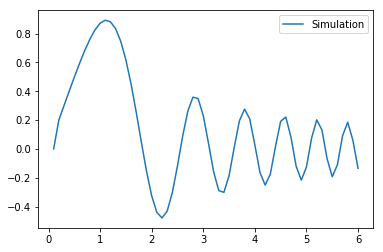

In [21]:
# Unsere Simulationsparameter:
dt      = 0.1
n_steps = 60
y0      = 0
t0      = 0.1

# Ein Vektor mit n_steps Elementen, alle zu Begin 0:
ys = simulate(y_d, t0, y0, dt, n_steps)

# Wir zeichnen unser Simulationsergebnis:
ts = np.arange(t0, t0 + n_steps * dt, dt)  
plt.plot(ts, ys)
plt.legend(["Simulation"])
plt.show()

## Fehleranalyse

Um abzuschätzen, wie große Fehler wir mit der expliziten Eulermethode machen, können wir unser Simulationsergebnis mit der uns bekannten Methode `y(t)` vergleichen.

### Aufgabe
Berechnet eine Liste `true_ys` mit `y(t)` über `ts`. Damit könnt ihr im Anschluss die absoluten Abweichungen zwischen der Simulation und den wahren Ergebnissen als `error` und dessen Kumulative Summe als `cum_error`.

In [22]:
true_ys   = np.vectorize(y)(ts)
error     = np.abs(ys - true_ys)
cum_error = np.cumsum(error)

### Kontrolle

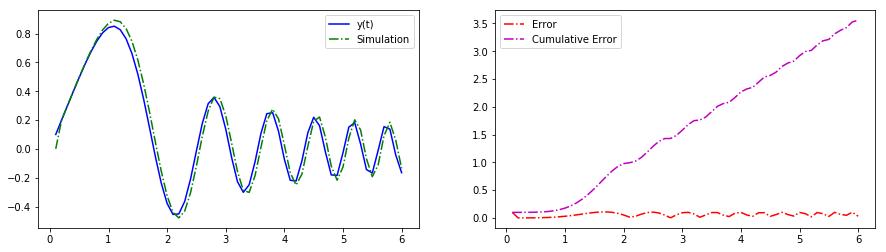

In [23]:
# Einstellen der Plot Dimensionen
plt.figure(figsize=(15,4))

# Hier werden zwei Plots (1 Reihe, 2 Spalten) gleichzeitig gezeichnet:
plt.subplot(1, 2, 1)
plt.plot(ts, true_ys, 'b') 
plt.plot(ts, ys, '-.g')
plt.legend(["y(t)", "Simulation"])

plt.subplot(1, 2, 2)
plt.plot(ts, error, '-.r')
plt.plot(ts, cum_error, '-.m')
plt.legend(["Error", "Cumulative Error"])
plt.show()

<h2> Lust auf mehr? <h2\> 

![infoabend](img/infoabend.png)